# 1. Long Term Market Index Regression
Aim: use a simple OLS regression to assess long term Log price development of a market index and lazy forecast level of under-overvaluation


### 1. Import Libriaries

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import LinearRegression 

### 2. Ticker Selection

In [5]:
ticker = 'NDX' #^GSPC

### 3. Import Data

In [6]:
index = pdr.DataReader(ticker,data_source='yahoo',start='01/01-1920')
#index.index = pd.to_datetime(index.index, format="%d/%m/%Y").to_period('D')

In [7]:
index.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1985-10-01,112.160004,110.565002,110.620003,112.139999,153160000.0,112.139999
1985-10-02,112.540001,110.779999,112.139999,110.824997,164640000.0,110.824997
1985-10-03,111.184998,110.120003,110.839996,110.870003,147300000.0,110.870003
1985-10-04,110.870003,109.855003,110.870003,110.074997,147900000.0,110.074997
1985-10-07,110.135002,108.175003,110.074997,108.199997,128640000.0,108.199997


### 4. Data Preparation

In [8]:
index.drop(['High', 'Low', 'Open','Adj Close','Volume'],axis=1,inplace=True)

In [9]:
index['Log_Close'] = np.log(index.Close)

### 5. Data Plot

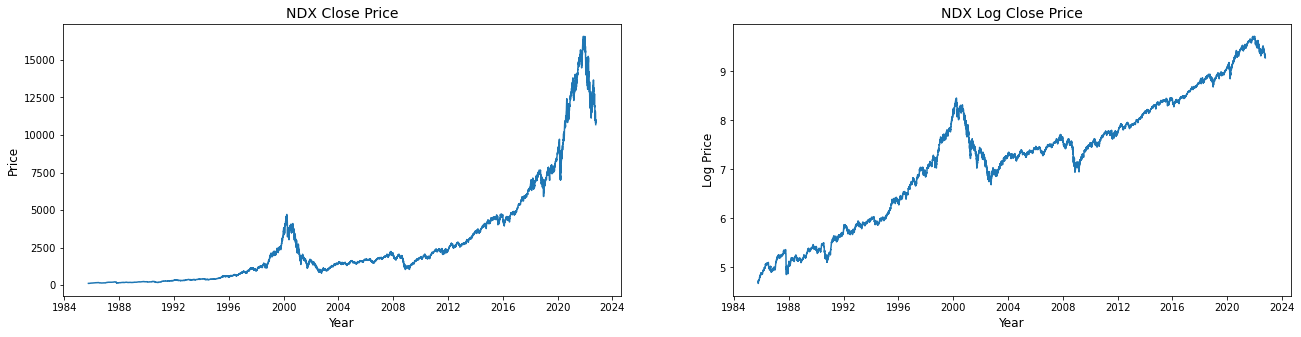

In [10]:
fig, axs = plt.subplots(1,2, figsize=(22, 5),sharex=True)
axs[0].plot(index.Close)
axs[1].plot(index.Log_Close)
#set titles
axs[0].set_title(f'{ticker} Close Price',fontsize=14)
axs[1].set_title(f'{ticker} Log Close Price',fontsize=14)
#set lables
axs[0].set_xlabel('Year',fontsize=12)
axs[0].set_ylabel('Price',fontsize=12)
axs[1].set_xlabel('Year',fontsize=12)
axs[1].set_ylabel('Log Price',fontsize=12);

### 6. OLS Regression

In [11]:
index['Count'] = np.arange(index.shape[0])

In [12]:
model = LinearRegression()
model.fit(np.array(index.Count[:-252]).reshape(-1,1),index.Log_Close[:-252])
OLS = model.predict(np.array(index.Count).reshape(-1,1))
index['OLS'] = OLS.tolist()
index['Delta'] = np.exp(index.Log_Close - index.OLS) - 1 

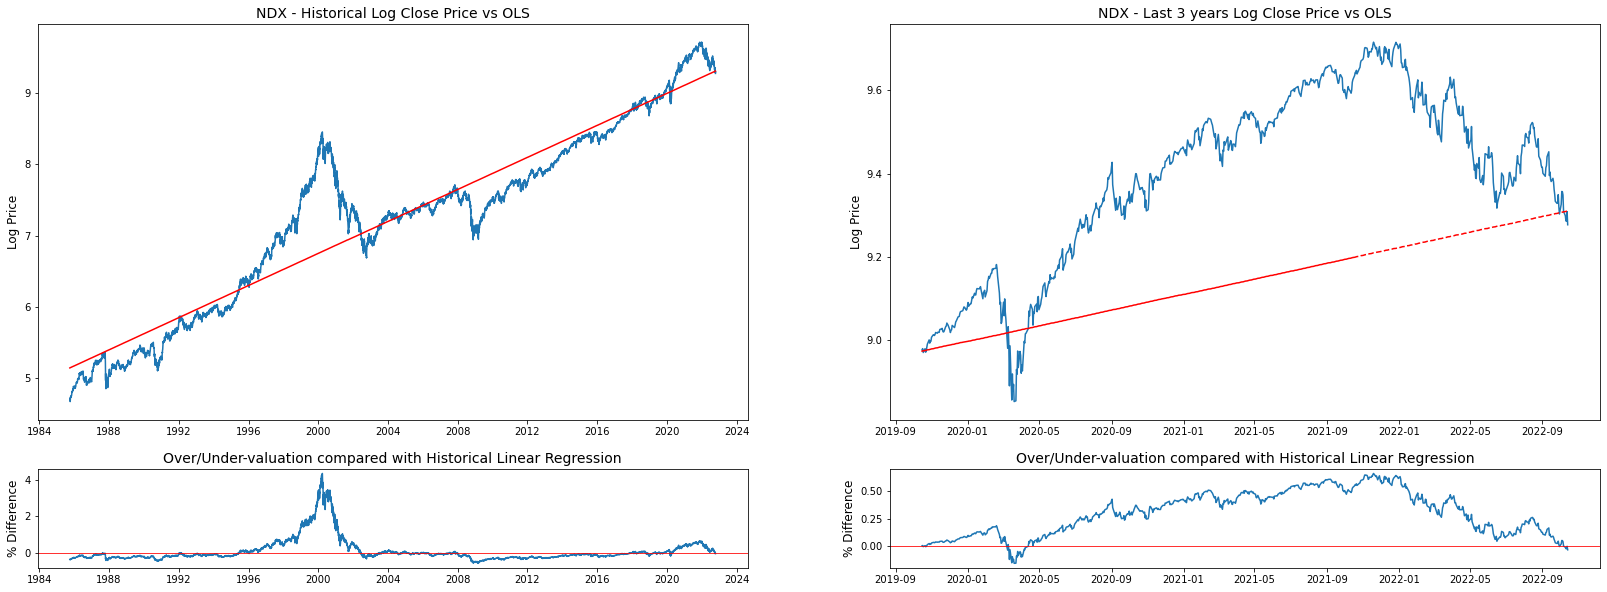

In [13]:
fig = plt.figure(figsize=(28, 10)) 
#aggiungi specifiche di griglia
gs = gridspec.GridSpec(2, 2, height_ratios=[4, 1]) 

ax0 = plt.subplot(gs[0])
ax0.plot(index.Log_Close)
ax0.plot(index.OLS, color='r')

ax1 = plt.subplot(gs[1])
ax1.plot(index.iloc[-756:].Log_Close)
ax1.plot(index.iloc[-756:].OLS[:-252],color='r')
ax1.plot(index.iloc[-756:].OLS[-252:],color='r',ls='--')

ax2 = plt.subplot(gs[2])
ax2.plot(index.Delta)
plt.axhline(0,lw=0.8,c='r')

ax3 = plt.subplot(gs[3])
ax3.plot(index.iloc[-756:].Delta)
plt.axhline(0,lw=0.8,c='r')
#aggiungi titoli
ax0.set_title(f'{ticker} - Historical Log Close Price vs OLS',fontsize=16)
ax1.set_title(f'{ticker} - Last 3 years Log Close Price vs OLS',fontsize=16)
ax2.set_title('Over/Under-valuation compared with Historical Linear Regression',fontsize=16)
ax3.set_title('Over/Under-valuation compared with Historical Linear Regression',fontsize=16)
#aggiungi etichette
ax0.set_ylabel('Log Price',fontsize=12)
ax1.set_ylabel('Log Price',fontsize=12)
ax2.set_ylabel('% Difference',fontsize=12)
ax3.set_ylabel('% Difference',fontsize=12);

### 8. Valuation

In [14]:
date = datetime.strftime(index.index[-1], '%d/%m/%Y')
last_price = np.exp(index.Log_Close[-1]).round(2)
OLS_price = np.exp(index.OLS[-1]).round(2)
delta = "{:.2%}".format(index.Delta[-1].round(5))
to_fair = "{:.2%}".format((OLS_price/last_price-1).round(5))
print(f'As of {date}, {ticker} closed at a price of {last_price}, compared to a long term fair value of {OLS_price} ({delta}), requiring the price to move by {to_fair} to reach fair value.')

As of 14/10/2022, NDX closed at a price of 10692.06, compared to a long term fair value of 11055.36 (-3.29%), requiring the price to move by 3.40% to reach fair value.
